In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'pm2.5.csv'

In [3]:
df = pd.read_csv(path)
df.shape

(43824, 13)

In [4]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
df.info() ###정보보기
## pm2.5 - 
## DEWP 이슬점
## TEMP 온도
## PRES 압력
## cbwd 풍향(문자)
## lws 풍속
## ls 눈의 양
## lr 비의 양

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [6]:
## 자주 사용할 미세먼지를 타겟변수에 저장
TARGET = 'pm2.5'

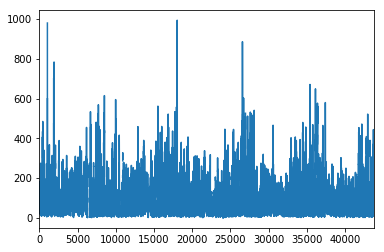

In [7]:
## 미세먼지 수치를 한 시간 간격으로 그래프로 살펴 봄
## 모두 0이상이고 대부분 100-200 사이
df[TARGET].plot()

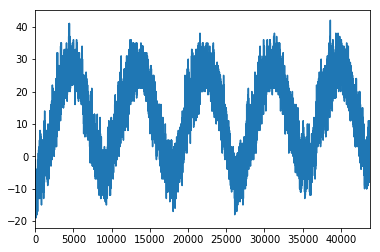

In [8]:
## 온도를 그래프로 살펴 봄
## 여름 겨울 구별 가능, 5년의 데이터
df['TEMP'].plot()

In [10]:
## 총 5개가 맞음
## 두 그래프를 비교해 보면 겨울~봄에 심하다는 것을 알 수 있음
df['year'].unique()

array([2010, 2011, 2012, 2013, 2014], dtype=int64)

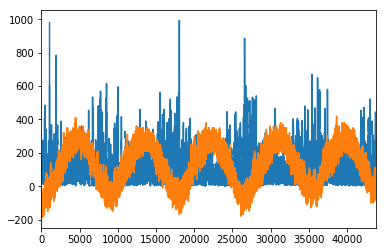

In [12]:
## 비교해 보기 위해 두 그래프를 겹쳐서 그려봄
## 단위가 맞지 않아 온도에 10을 곱하였음(눈으로 보기 위해서)
df[TARGET].plot()
(df['TEMP']*10).plot()

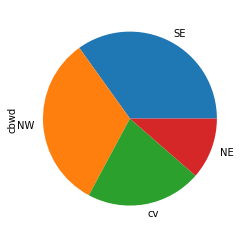

In [16]:
## 바람의 방향이 무슨 방향(북서,남서,남동 등)으로 몇 번 나왔나
## 북서풍이 가장 많음(중국의 영향)
df.cbwd.value_counts().plot.pie()

In [18]:
### 데이터 정제 - 누락데이터 처리, 카테고리->수치형으로 변환(그래야만 RNN쓸 수 있음)

In [19]:
### 누락데이터 살펴보는 함수
### 누락 있으면 true,없으면 false
df.isna()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,False,False,False


In [20]:
### 한눈에 보기 힘드므로 갯수로 컬럼별로 확인 
### 미세먼지에만 2067개 있음
df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [21]:
### 2067이 얼마나 많은가? 적은가?생각해 봐야함
df.isna().sum().sum()

2067

In [22]:
### 얼마나 많은지 살펴봄
### 누락데이터의 비율(데이터프레임의 길이로 나누면)
### 4.7%이므로 적은 데이터(적은 값이라 버릴것임)
df.isna().sum().sum()/len(df)

0.04716593647316539

In [29]:
### 누락값이 있으면 버림
df = df.dropna()
df.shape

(41757, 13)

In [30]:
### 누락 값이 있나 확인 
### 없음
df.isna().sum().sum()

0

In [31]:
### 카테고리 컬럼만 수치형으로 변환하면 됨
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [34]:
### 수치형으로 변환
df_dummy = pd.get_dummies(df)
df_dummy.shape

(41757, 16)

In [35]:
## 풍향 컬럼이 4개의 컬럼으로 바뀜
df_dummy.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


In [36]:
### 마지막 5행
df_dummy.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,249.85,0,0,0,1,0,0


In [37]:
### 필요하지 않은 컬럼 삭제(학습시키지 않을 컬럼)
### No,month,day,hour 컬럼이 의미가 없음
### 시계열 데이터이므로 정렬해야함 (이미 정렬되어 있음)

In [39]:
drop_columns = ['No','year','month','day','hour']
df_xy = df_dummy.drop(columns=drop_columns)
df_xy.shape
### 16->11로 줄음

(41757, 11)

In [40]:
### 삭제 된 것 확인
### 학습에 사용될 데이터만 남겨둠 (전처리 되었음)
df_xy.head(2)

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
24,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
25,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0


In [41]:
### 전처리 - RNN 모델로 학습시킬 수 있도록 X,Y를 만들기(교사학습)
### 무엇으로 무엇을 예측할 것인가?
### 지난 일주일간의 기상 데이터로부터 내일 24시간 동안의 미세먼지 농도 예측할것임
### 7(일) * 24(시간) + 11특징(컬럼) -> 1일 *24시간 *1개(pm2.5 다른 컬럼은 궁금X)
### (7*24, 11) -> (24, 1)

In [51]:
### 시간별로 나타나는 데이터인 시계열 데이터이기 떄문에
sequence_x = 7*24          ###(일주일,7일치)
sequence_y = 24            ###(하루) 


### 41757시간의 데이터
len(df_xy)

41757

In [48]:
## 만약 5시간치의 데이터가 있다고 치면 3시간 정보로 다음 1시간의 뭔가를 예측하고 싶음.
'''1시. x1   
   2시. x1   x2
   3시. x1   x2
   4시. y1   x2
   5시.      y2'''
### x1,x1,x1으로 부터 y1 예측
### x2,x2,x2로부터 y2 예측
### 두 세트를 얻을 수 있다.
### 5 - (3+1) + 1 = 4

'1시. x1   \n   2시. x1   x2\n   3시. x1   x2\n   4시. y1   x2\n   5시.      y2'

In [49]:
## 만약 5시간치의 데이터가 있다고 치면 3시간 정보로 다음 2시간의 뭔가를 예측하고 싶음.
### 5- (3+2) + 1 = 1

In [64]:
### 14566개의 데이터 셋을 만들 수 있음
### 컬럼의 갯수=11
### x모델 168시간 데이터로부터
### y모델 24시간 데이터 예측
m = len(df_xy) - (sequence_x + sequence_y) +1
feature_k = df_xy.shape[-1]
(m, sequence_x, feature_k),(m, sequence_y, 1)

((41566, 168, 11), (41566, 24, 1))

In [65]:
data_x = np.zeros((m, sequence_x, feature_k), np.float32)
data_y = np.zeros((m, sequence_y, 1), np.float32)

In [66]:
### 컴파일 속도를 위해 배열로 변환
df_arr = np.array(df_xy)

In [68]:
### 7일씩(일주일씩) 잘라서 구분
### m만큼 반복문을 통해
### 24시간의 미세먼지 농도도 저장
for i in range(m):
    data_x[i] = df_arr[i:i+sequence_x]
    data_y[i] = df_arr[i+sequence_x:i+sequence_x+sequence_y,0:1]

In [69]:
### 잘만들어 졌나 확인
data_y[0]

array([[165.],
       [159.],
       [167.],
       [196.],
       [169.],
       [155.],
       [119.],
       [106.],
       [ 93.],
       [ 84.],
       [ 73.],
       [ 66.],
       [ 40.],
       [ 49.],
       [ 50.],
       [ 49.],
       [ 41.],
       [ 37.],
       [ 45.],
       [ 44.],
       [ 54.],
       [ 50.],
       [ 47.],
       [ 66.]], dtype=float32)

In [70]:
### 정규화(0!1) - minmax
### ex.온도는 -10~40 미세먼지 농도는 1000까지 감.
### 단위 통일 

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
### x는 정규화
### y는 역정규화

In [74]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [78]:
### 시계열이라 데이터가 3차원임.
### 2차원으로 바꿨다가 3차원으로 복원해야 함.
### 정규화가 잘 되었는지 최솟값 최댓값 출력
### 최솟값 0 최댓값 1로 정규화 되었음
data_x_2d = np.reshape(data_x,[-1, feature_k])
scaler_x = scaler_x.fit(data_x_2d)
data_x_2d_normal = scaler_x.transform(data_x_2d)
data_x_normal = np.reshape(data_x_2d_normal, data_x.shape)
data_x_normal.shape, np.min(data_x_normal),np.max(data_x_normal)

((41566, 168, 11), 0.0, 1.0)

In [81]:
### y도 정규화
scaler_y = scaler_y.fit(data_y[:,:,0])
data_y_normal_2d = scaler_y.transform(data_y[:,:,0])
data_y_normal = np.expand_dims(data_y_normal_2d,-1)

In [84]:
### 정규화 되었음.
data_y_normal.shape, np.min(data_y_normal), np.max(data_y_normal)

((41566, 24, 1), 0.0, 0.99999994)

In [85]:
#### 학습용/테스트용 분리

In [88]:
### x는 앞에서 1000개
### y는 1000개 다음부터 2000개 사이꺼
m_train = 1000
m_test = 1000
x_train = data_x_normal[:m_train]
x_test = data_x_normal[m_train:m_train+m_test]
y_train = data_y_normal[:m_train]
y_test = data_y_normal[m_train:m_train+m_test]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1000, 168, 11), (1000, 168, 11), (1000, 24, 1), (1000, 24, 1))

In [93]:
###############################

### RNN 모델 구현

################################
'''
- 3차원의 시계열 데이터
- 시퀀스(시간축)길이 7일 * 24시간 = 168시간
- RNN 168번 수행 되어야 함.(시간 오래걸릴 것)
- convolution사용할것 
- 커널의 길이는 몇시간의 정보를 인코딩 할것을 결정 
- 커널의 길이 7, 스트라이드 3(overfit 방지)
- 정보 인코딩 32 (output)
- RNN 셀선택 : RNN(기본셀), <GRU>, LSTM(복잡)
- 인코딩 32 output
- RNN의 마지막 시퀀스 output -> FC > 24개의 미세먼지 농도 예측
'''

'\n- 3차원의 시계열 데이터\n- 시퀀스(시간축)길이 7일 * 24시간 = 168시간\n- RNN 168번 수행 되어야 함.(시간 오래걸릴 것)\n- convolution사용할것 \n- 커널의 길이는 몇시간의 정보를 인코딩 할것을 결정 \n- 커널의 길이 7, 스트라이드 3(overfit 방지)\n- 정보 인코딩 32 (output)\n- RNN 셀선택 : RNN(기본셀), <GRU>, LSTM(복잡)\n- 인코딩 32 output\n'

In [94]:
import tensorflow as tf
import tensorflow.contrib.slim as slim

In [138]:
## 모델 구현
## convolution할것임
#outputs(m,168/3,32)
def model(x):
    net = slim.conv1d(x, 32, 7, 1)
    print('net',net)
    cell = tf.keras.layers.GRUCell(32)
    outputs, state = tf.nn.dynamic_rnn(cell, net, dtype=tf.float32) 
    output_last = outputs[:,-1]
    out = slim.fully_connected(output_last,sequence_y)
    return out

In [139]:
### 회귀 모델이므로 결정계수로 정확도(성능) 확인.
### 결정계수는 1 - 오차제곱의 합 / 편차제곱의 합
### 오차는 (실제값-예측값)
### 편차는 (실제값-평균값)
PX = tf.placeholder(tf.float32, [None, sequence_x, feature_k])
PY = tf.placeholder(tf.float32, [None, sequence_y, 1])
PY_2d = PY[:,:,0]
h = model(PX)
print('h',h)
cost = tf.reduce_mean(tf.square(h - PY_2d))
opt = tf.train.GradientDescentOptimizer(0.1)
train_op = opt.minimize(cost)
r2= 1-tf.reduce_sum(tf.square(PY_2d-h))/tf.reduce_sum(tf.square(PY_2d-tf.reduce_mean(PY_2d)))


net Tensor("Conv_13/Relu:0", shape=(?, 168, 32), dtype=float32)
h Tensor("fully_connected_9/Relu:0", shape=(?, 24), dtype=float32)


In [113]:
gpu_options = tf.GPUOptions(visible_device_list="1")
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

In [140]:
for iter in range(1500):
    _, _cost, _r2 = sess.run([train_op, cost, r2], {PX:x_train, PY:y_train})
    if iter%100==0:
        _r2_e = sess.run(r2, {PX:x_test, PY:y_test})
        print('%d cost:%.5f, r2 train:%.2f, r2 test:%2.f' %(iter, _cost, _r2, _r2_e))

FailedPreconditionError: Attempting to use uninitialized value fully_connected_9/biases
	 [[node fully_connected_9/biases/read (defined at <ipython-input-138-e8418d0696ff>:10) ]]

Caused by op 'fully_connected_9/biases/read', defined at:
  File "C:\anaconda\envs\py36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\anaconda\envs\py36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\anaconda\envs\py36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\anaconda\envs\py36\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\anaconda\envs\py36\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\anaconda\envs\py36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-139-a60c10c2b417>", line 8, in <module>
    h = model(PX)
  File "<ipython-input-138-e8418d0696ff>", line 10, in model
    out = slim.fully_connected(output_last,sequence_y)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1855, in fully_connected
    outputs = layer.apply(inputs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1227, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\layers\base.py", line 530, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 538, in __call__
    self._maybe_build(inputs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1603, in _maybe_build
    self.build(input_shapes)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\layers\core.py", line 958, in build
    trainable=True)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\layers\base.py", line 435, in add_weight
    getter=vs.get_variable)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 349, in add_weight
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\training\checkpointable\base.py", line 607, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1479, in get_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1220, in get_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 530, in get_variable
    return custom_getter(**custom_getter_kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1750, in layer_variable_getter
    return _model_variable_getter(getter, *args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1741, in _model_variable_getter
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\variables.py", line 350, in model_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\variables.py", line 277, in variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 499, in _true_getter
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 911, in _get_single_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2495, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 1395, in __init__
    constraint=constraint)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 1557, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\array_ops.py", line 81, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 4537, in identity
    "Identity", input=input, name=name)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value fully_connected_9/biases
	 [[node fully_connected_9/biases/read (defined at <ipython-input-138-e8418d0696ff>:10) ]]


In [126]:
### 시각화 - 정답과 예측
##########################


### plt.plot(y_train_inverse[:,?]
### ?에 알고 싶은 다음 날의시간을 주면 됨



In [141]:
h_train = sess.run(h, {PX:x_train})

FailedPreconditionError: Attempting to use uninitialized value fully_connected_9/biases
	 [[node fully_connected_9/biases/read (defined at <ipython-input-138-e8418d0696ff>:10) ]]

Caused by op 'fully_connected_9/biases/read', defined at:
  File "C:\anaconda\envs\py36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\anaconda\envs\py36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\anaconda\envs\py36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\anaconda\envs\py36\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\anaconda\envs\py36\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\anaconda\envs\py36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-139-a60c10c2b417>", line 8, in <module>
    h = model(PX)
  File "<ipython-input-138-e8418d0696ff>", line 10, in model
    out = slim.fully_connected(output_last,sequence_y)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1855, in fully_connected
    outputs = layer.apply(inputs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1227, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\layers\base.py", line 530, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 538, in __call__
    self._maybe_build(inputs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1603, in _maybe_build
    self.build(input_shapes)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\layers\core.py", line 958, in build
    trainable=True)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\layers\base.py", line 435, in add_weight
    getter=vs.get_variable)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 349, in add_weight
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\training\checkpointable\base.py", line 607, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1479, in get_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1220, in get_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 530, in get_variable
    return custom_getter(**custom_getter_kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1750, in layer_variable_getter
    return _model_variable_getter(getter, *args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1741, in _model_variable_getter
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\variables.py", line 350, in model_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\variables.py", line 277, in variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 499, in _true_getter
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 911, in _get_single_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2495, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 1395, in __init__
    constraint=constraint)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 1557, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\array_ops.py", line 81, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 4537, in identity
    "Identity", input=input, name=name)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value fully_connected_9/biases
	 [[node fully_connected_9/biases/read (defined at <ipython-input-138-e8418d0696ff>:10) ]]


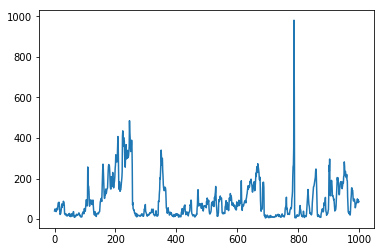

In [129]:
####### 정답 #######
y_train_inverse = scaler_y.inverse_transform(y_train[:,:,0])
plt.plot(y_train_inverse[:,12])

In [142]:
####### 정답과 예측을 한꺼번에 #######
hour = 6
y_train_inverse = scaler_y.inverse_transform(y_train[:,:,0])
h_train_inverse = scaler_y.inverse_transform(h_train[:,:])

plt.plot(y_train_inverse[:,hour])
plt.plot(h_train_inverse[:,hour])

NameError: name 'h_train' is not defined

In [143]:
h_test = sess.run(h, {PX:x_test})
y_test_inverse = scaler_y.inverse_transform(y_test[:,:,0])
h_test_inverse = scaler_y.inverse_transform(h_test[:,:])

plt.plot(y_test_inverse[:,hour])
plt.plot(h_test_inverse[:,hour])

FailedPreconditionError: Attempting to use uninitialized value Conv_13/weights
	 [[node Conv_13/weights/read (defined at <ipython-input-138-e8418d0696ff>:5) ]]

Caused by op 'Conv_13/weights/read', defined at:
  File "C:\anaconda\envs\py36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\anaconda\envs\py36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\anaconda\envs\py36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\anaconda\envs\py36\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\anaconda\envs\py36\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\anaconda\envs\py36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\anaconda\envs\py36\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\anaconda\envs\py36\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\anaconda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-139-a60c10c2b417>", line 8, in <module>
    h = model(PX)
  File "<ipython-input-138-e8418d0696ff>", line 5, in model
    net = slim.conv1d(x, 32, 7, 1)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1112, in convolution1d
    conv_dims=1)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1058, in convolution
    outputs = layer.apply(inputs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1227, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\layers\base.py", line 530, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 538, in __call__
    self._maybe_build(inputs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1603, in _maybe_build
    self.build(input_shapes)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\layers\convolutional.py", line 165, in build
    dtype=self.dtype)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\layers\base.py", line 435, in add_weight
    getter=vs.get_variable)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\keras\engine\base_layer.py", line 349, in add_weight
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\training\checkpointable\base.py", line 607, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1479, in get_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1220, in get_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 530, in get_variable
    return custom_getter(**custom_getter_kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1750, in layer_variable_getter
    return _model_variable_getter(getter, *args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\layers\python\layers\layers.py", line 1741, in _model_variable_getter
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\variables.py", line 350, in model_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\arg_scope.py", line 182, in func_with_args
    return func(*args, **current_args)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\contrib\framework\python\ops\variables.py", line 277, in variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 499, in _true_getter
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 911, in _get_single_variable
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variable_scope.py", line 2495, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 1395, in __init__
    constraint=constraint)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\variables.py", line 1557, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\array_ops.py", line 81, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 4537, in identity
    "Identity", input=input, name=name)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\anaconda\envs\py36\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Conv_13/weights
	 [[node Conv_13/weights/read (defined at <ipython-input-138-e8418d0696ff>:5) ]]
